In [17]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data pre processing

In [18]:
df = pd.read_csv('stockHistory.csv')

In [19]:
df.head()

,Date,Open,Price,High,Low,Vol(M),Change%,Unnamed: 7
0,2021-01-04,12694.67,12950.22,12950.22,12537.42,242.64,-1.50,NaN
1,2021-01-05,12802.38,12663.13,12809.67,12663.13,175.19,0.85,NaN
2,2021-01-06,12623.35,12601.26,12803.29,12569.42,243.87,-1.40,NaN
3,2021-01-07,12939.57,12745.41,12966.68,12744.82,215.74,2.51,NaN
4,2021-01-08,13105.20,13037.24,13113.09,12939.73,220.39,1.28,NaN


In [20]:
df = df.rename(columns = {'Price':'Close', 'Vol(M)':'Volume'})

In [21]:
df = df.drop(df.columns[[6, 7]], axis = 1)

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
Close            float64
High             float64
Low              float64
Volume           float64
dtype: object

In [23]:
df.set_index('Date', inplace=True)
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2021-01-04,12694.67,12950.22,12950.22,12537.42,242.64
2021-01-05,12802.38,12663.13,12809.67,12663.13,175.19
2021-01-06,12623.35,12601.26,12803.29,12569.42,243.87
2021-01-07,12939.57,12745.41,12966.68,12744.82,215.74
2021-01-08,13105.20,13037.24,13113.09,12939.73,220.39


# Build environment
### reference : https://github.com/AminHP/gym-anytrading
### docs : https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html

In [24]:

def __init__(self):
    super(env, self).__init__()
    n_actions = 2
    self.action_space = spaces.Discrete(n_actions)
    self.observation_space = spaces.Box(low=-1, high=1, shape=(5, 2), dtype="float32")
    

In [25]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=5)

In [26]:
env.action_space

Discrete(2)

In [27]:
obs = env.reset()
obs

array([[12663.13,  -287.09],
       [12601.26,   -61.87],
       [12745.41,   144.15],
       [13037.24,   291.83],
       [12961.5 ,   -75.74]])

In [28]:
# Box(4,) means that it is a Vector with 4 components
print("Observation space:", env.observation_space)
print("Shape:", env.observation_space.shape)
# Discrete(2) means that there is two discrete actions
print("Action space:", env.action_space)

# The reset method is called at the beginning of an episode
obs = env.reset()
# Sample a random action
action = env.action_space.sample()
print("Sampled action:", action)
obs, reward, done, info = env.step(action)
# Note the obs is a numpy array
# info is an empty dict for now but can contain any debugging info
# reward is a scalar
print(obs.shape, reward, done, info)

Observation space: Box([[-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]
 [-inf -inf]], [[inf inf]
 [inf inf]
 [inf inf]
 [inf inf]
 [inf inf]], (5, 2), float32)
Shape: (5, 2)
Action space: Discrete(2)
Sampled action: 1
(5, 2) 0 False {'total_reward': 0.0, 'total_profit': 1.0, 'position': 1}


In [29]:
env.prices

array([12950.22, 12663.13, 12601.26, 12745.41, 13037.24, 12961.5 ,
       12916.1 , 12911.87, 13010.94, 12898.09, 12921.61, 13155.11,
       13356.7 , 13356.18, 13515.63, 13507.47, 13371.16, 13163.32,
       13124.7 , 13067.65, 13371.36, 13555.03, 13454.85, 13592.77,
       13672.33, 13667.14, 13751.42, 13723.63, 13695.9 , 13841.03,
       13636.15, 13556.01, 13686.23, 13414.04, 12982.36, 13095.86,
       13197.75, 12958.97, 13106.02, 13297.76, 13020.1 , 12655.92,
       12594.16, 12629.56, 12635.45, 12950.25, 12960.53, 12873.39,
       12936.13, 13156.65, 13024.83, 13006.29, 12792.67, 12943.14,
       13127.17, 13072.82, 12707.58, 12777.27, 12950.51, 12904.01,
       12970.33, 13268.88, 13434.04, 13567.2 , 13553.9 , 13730.73,
       13709.67, 13792.74, 13874.58, 13988.86, 13934.87, 14035.96,
       13970.83, 13891.96, 13768.92, 13920.88, 13794.49, 13954.94,
       14048.13, 13953.61, 14063.94, 13857.79, 13923.04, 13680.63,
       13649.12, 13490.94, 13715.56, 13647.73, 13102.64, 13155

In [30]:
env.signal_features

array([[ 1.295022e+04,  0.000000e+00],
       [ 1.266313e+04, -2.870900e+02],
       [ 1.260126e+04, -6.187000e+01],
       [ 1.274541e+04,  1.441500e+02],
       [ 1.303724e+04,  2.918300e+02],
       [ 1.296150e+04, -7.574000e+01],
       [ 1.291610e+04, -4.540000e+01],
       [ 1.291187e+04, -4.230000e+00],
       [ 1.301094e+04,  9.907000e+01],
       [ 1.289809e+04, -1.128500e+02],
       [ 1.292161e+04,  2.352000e+01],
       [ 1.315511e+04,  2.335000e+02],
       [ 1.335670e+04,  2.015900e+02],
       [ 1.335618e+04, -5.200000e-01],
       [ 1.351563e+04,  1.594500e+02],
       [ 1.350747e+04, -8.160000e+00],
       [ 1.337116e+04, -1.363100e+02],
       [ 1.316332e+04, -2.078400e+02],
       [ 1.312470e+04, -3.862000e+01],
       [ 1.306765e+04, -5.705000e+01],
       [ 1.337136e+04,  3.037100e+02],
       [ 1.355503e+04,  1.836700e+02],
       [ 1.345485e+04, -1.001800e+02],
       [ 1.359277e+04,  1.379200e+02],
       [ 1.367233e+04,  7.956000e+01],
       [ 1.366714e+04, -5

info {'total_reward': 1351.319999999996, 'total_profit': 0.5670366125481358, 'position': 0}


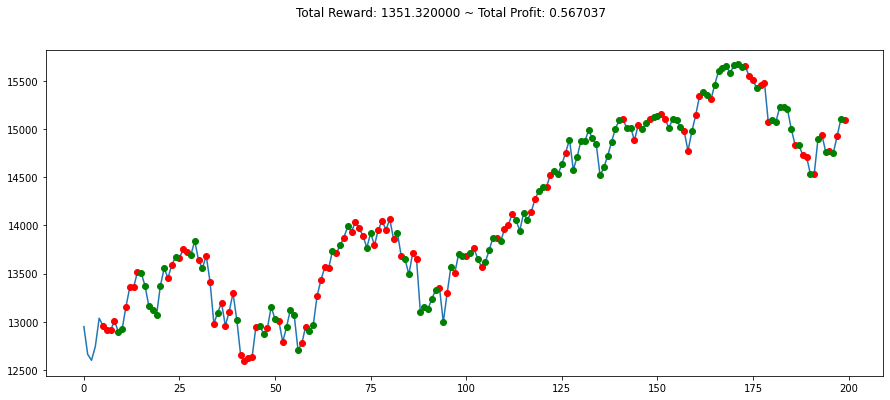

In [31]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# Build Environment and Train

In [32]:
env = DummyVecEnv([lambda: gym.make('stocks-v0', df=df, frame_bound=(5,200), window_size=10)])

In [33]:
model = A2C('MlpLstmPolicy', env, verbose=1, tensorboard_log="./a2c_stockBoat_tensorboard/") 
model.learn(total_timesteps=1000000)


---------------------------------
| explained_variance | -0.342   |
| fps                | 16       |
| nupdates           | 1        |
| policy_entropy     | 0.691    |
| total_timesteps    | 5        |
| value_loss         | 90.7     |
---------------------------------

---------------------------------
| explained_variance | 5.96e-08 |
| fps                | 407      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 3.76e+04 |
---------------------------------
---------------------------------
| explained_variance | -8.7e-06 |
| fps                | 460      |
| nupdates           | 200      |
| policy_entropy     | 0.691    |
| total_timesteps    | 1000     |
| value_loss         | 5.66e+03 |
---------------------------------
---------------------------------
| explained_variance | -39.4    |
| fps                | 480      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_time

----------------------------------
| explained_variance | -0.000931 |
| fps                | 508       |
| nupdates           | 2900      |
| policy_entropy     | 0.677     |
| total_timesteps    | 14500     |
| value_loss         | 977       |
----------------------------------
---------------------------------
| explained_variance | 0.032    |
| fps                | 508      |
| nupdates           | 3000     |
| policy_entropy     | 0.538    |
| total_timesteps    | 15000    |
| value_loss         | 3.65e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000691 |
| fps                | 508       |
| nupdates           | 3100      |
| policy_entropy     | 0.685     |
| total_timesteps    | 15500     |
| value_loss         | 1.7e+05   |
----------------------------------
----------------------------------
| explained_variance | -4.15e-05 |
| fps                | 509       |
| nupdates           | 3200      |
| policy_entropy     | 0.693

---------------------------------
| explained_variance | 0.232    |
| fps                | 502      |
| nupdates           | 5900     |
| policy_entropy     | 0.655    |
| total_timesteps    | 29500    |
| value_loss         | 0.308    |
---------------------------------
----------------------------------
| explained_variance | -7.82e-05 |
| fps                | 503       |
| nupdates           | 6000      |
| policy_entropy     | 0.672     |
| total_timesteps    | 30000     |
| value_loss         | 7.55e+04  |
----------------------------------
---------------------------------
| explained_variance | 8.61e-05 |
| fps                | 503      |
| nupdates           | 6100     |
| policy_entropy     | 0.646    |
| total_timesteps    | 30500    |
| value_loss         | 8.17e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0689   |
| fps                | 503      |
| nupdates           | 6200     |
| policy_entropy     | 0.665    |
| tota

----------------------------------
| explained_variance | -0.000162 |
| fps                | 502       |
| nupdates           | 8900      |
| policy_entropy     | 0.683     |
| total_timesteps    | 44500     |
| value_loss         | 521       |
----------------------------------
----------------------------------
| explained_variance | -0.000169 |
| fps                | 502       |
| nupdates           | 9000      |
| policy_entropy     | 0.661     |
| total_timesteps    | 45000     |
| value_loss         | 3.95e+03  |
----------------------------------
----------------------------------
| explained_variance | -0.000199 |
| fps                | 503       |
| nupdates           | 9100      |
| policy_entropy     | 0.651     |
| total_timesteps    | 45500     |
| value_loss         | 3.5e+03   |
----------------------------------
---------------------------------
| explained_variance | 0.00938  |
| fps                | 503      |
| nupdates           | 9200     |
| policy_entropy     | 0

---------------------------------
| explained_variance | 5.27e-05 |
| fps                | 503      |
| nupdates           | 11900    |
| policy_entropy     | 0.664    |
| total_timesteps    | 59500    |
| value_loss         | 5.37e+03 |
---------------------------------
---------------------------------
| explained_variance | 2.22e-05 |
| fps                | 502      |
| nupdates           | 12000    |
| policy_entropy     | 0.662    |
| total_timesteps    | 60000    |
| value_loss         | 5.16e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00032  |
| fps                | 502      |
| nupdates           | 12100    |
| policy_entropy     | 0.663    |
| total_timesteps    | 60500    |
| value_loss         | 179      |
---------------------------------
---------------------------------
| explained_variance | -0.0027  |
| fps                | 502      |
| nupdates           | 12200    |
| policy_entropy     | 0.688    |
| total_timest

---------------------------------
| explained_variance | -0.256   |
| fps                | 509      |
| nupdates           | 14900    |
| policy_entropy     | 0.644    |
| total_timesteps    | 74500    |
| value_loss         | 71.6     |
---------------------------------
----------------------------------
| explained_variance | -5.96e-06 |
| fps                | 509       |
| nupdates           | 15000     |
| policy_entropy     | 0.598     |
| total_timesteps    | 75000     |
| value_loss         | 2.81e+04  |
----------------------------------
---------------------------------
| explained_variance | 2.82e-05 |
| fps                | 509      |
| nupdates           | 15100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 75500    |
| value_loss         | 5.95e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000125 |
| fps                | 509       |
| nupdates           | 15200     |
| policy_entropy     | 0.679     |
|

----------------------------------
| explained_variance | -4.41e-05 |
| fps                | 494       |
| nupdates           | 17900     |
| policy_entropy     | 0.623     |
| total_timesteps    | 89500     |
| value_loss         | 3.65e+04  |
----------------------------------
----------------------------------
| explained_variance | -3.58e-06 |
| fps                | 493       |
| nupdates           | 18000     |
| policy_entropy     | 0.658     |
| total_timesteps    | 90000     |
| value_loss         | 2.97e+04  |
----------------------------------
---------------------------------
| explained_variance | 6.44e-06 |
| fps                | 493      |
| nupdates           | 18100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 90500    |
| value_loss         | 8.7e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.0241   |
| fps                | 493      |
| nupdates           | 18200    |
| policy_entropy     | 0.693    

---------------------------------
| explained_variance | -3.3e-05 |
| fps                | 487      |
| nupdates           | 20900    |
| policy_entropy     | 0.655    |
| total_timesteps    | 104500   |
| value_loss         | 3.41e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.03e-05 |
| fps                | 487      |
| nupdates           | 21000    |
| policy_entropy     | 0.687    |
| total_timesteps    | 105000   |
| value_loss         | 2.12e+03 |
---------------------------------
---------------------------------
| explained_variance | 7.93e-06 |
| fps                | 487      |
| nupdates           | 21100    |
| policy_entropy     | 0.689    |
| total_timesteps    | 105500   |
| value_loss         | 4.61e+04 |
---------------------------------
---------------------------------
| explained_variance | 2.18e-05 |
| fps                | 487      |
| nupdates           | 21200    |
| policy_entropy     | 0.664    |
| total_timest

---------------------------------
| explained_variance | 1.95e-05 |
| fps                | 483      |
| nupdates           | 23900    |
| policy_entropy     | 0.689    |
| total_timesteps    | 119500   |
| value_loss         | 7.43e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00563  |
| fps                | 483      |
| nupdates           | 24000    |
| policy_entropy     | 0.692    |
| total_timesteps    | 120000   |
| value_loss         | 0.792    |
---------------------------------
---------------------------------
| explained_variance | 4.61e-05 |
| fps                | 483      |
| nupdates           | 24100    |
| policy_entropy     | 0.686    |
| total_timesteps    | 120500   |
| value_loss         | 2.87e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00809 |
| fps                | 483      |
| nupdates           | 24200    |
| policy_entropy     | 0.668    |
| total_timest

---------------------------------
| explained_variance | -0.00102 |
| fps                | 482      |
| nupdates           | 26900    |
| policy_entropy     | 0.46     |
| total_timesteps    | 134500   |
| value_loss         | 1        |
---------------------------------
----------------------------------
| explained_variance | -9.76e-05 |
| fps                | 482       |
| nupdates           | 27000     |
| policy_entropy     | 0.615     |
| total_timesteps    | 135000    |
| value_loss         | 1.02      |
----------------------------------
---------------------------------
| explained_variance | 3.7e-05  |
| fps                | 482      |
| nupdates           | 27100    |
| policy_entropy     | 0.692    |
| total_timesteps    | 135500   |
| value_loss         | 5.09e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0625   |
| fps                | 482      |
| nupdates           | 27200    |
| policy_entropy     | 0.598    |
| tota

----------------------------------
| explained_variance | -0.000121 |
| fps                | 479       |
| nupdates           | 29900     |
| policy_entropy     | 0.681     |
| total_timesteps    | 149500    |
| value_loss         | 27.8      |
----------------------------------
---------------------------------
| explained_variance | 0.0127   |
| fps                | 479      |
| nupdates           | 30000    |
| policy_entropy     | 0.626    |
| total_timesteps    | 150000   |
| value_loss         | 0.854    |
---------------------------------
---------------------------------
| explained_variance | -0.00146 |
| fps                | 478      |
| nupdates           | 30100    |
| policy_entropy     | 0.681    |
| total_timesteps    | 150500   |
| value_loss         | 0.816    |
---------------------------------
---------------------------------
| explained_variance | 1.81e-05 |
| fps                | 478      |
| nupdates           | 30200    |
| policy_entropy     | 0.571    |
| tota

---------------------------------
| explained_variance | 4.57e-05 |
| fps                | 477      |
| nupdates           | 32900    |
| policy_entropy     | 0.659    |
| total_timesteps    | 164500   |
| value_loss         | 1.37e+05 |
---------------------------------
---------------------------------
| explained_variance | 3.99e-06 |
| fps                | 477      |
| nupdates           | 33000    |
| policy_entropy     | 0.472    |
| total_timesteps    | 165000   |
| value_loss         | 2.24e+03 |
---------------------------------
----------------------------------
| explained_variance | -9.18e-06 |
| fps                | 477       |
| nupdates           | 33100     |
| policy_entropy     | 0.559     |
| total_timesteps    | 165500    |
| value_loss         | 1.69e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000103 |
| fps                | 477       |
| nupdates           | 33200     |
| policy_entropy     | 0.668     |
|

---------------------------------
| explained_variance | 0.000127 |
| fps                | 477      |
| nupdates           | 35900    |
| policy_entropy     | 0.621    |
| total_timesteps    | 179500   |
| value_loss         | 83.3     |
---------------------------------
---------------------------------
| explained_variance | 6.66e-05 |
| fps                | 477      |
| nupdates           | 36000    |
| policy_entropy     | 0.674    |
| total_timesteps    | 180000   |
| value_loss         | 764      |
---------------------------------
----------------------------------
| explained_variance | -2.36e-05 |
| fps                | 477       |
| nupdates           | 36100     |
| policy_entropy     | 0.632     |
| total_timesteps    | 180500    |
| value_loss         | 1.8e+04   |
----------------------------------
----------------------------------
| explained_variance | -0.000443 |
| fps                | 477       |
| nupdates           | 36200     |
| policy_entropy     | 0.646     |
|

----------------------------------
| explained_variance | -9.54e-06 |
| fps                | 477       |
| nupdates           | 38900     |
| policy_entropy     | 0.637     |
| total_timesteps    | 194500    |
| value_loss         | 1.58e+04  |
----------------------------------
---------------------------------
| explained_variance | 5.6e-06  |
| fps                | 477      |
| nupdates           | 39000    |
| policy_entropy     | 0.689    |
| total_timesteps    | 195000   |
| value_loss         | 9.71e+03 |
---------------------------------
---------------------------------
| explained_variance | 2.27e-05 |
| fps                | 477      |
| nupdates           | 39100    |
| policy_entropy     | 0.632    |
| total_timesteps    | 195500   |
| value_loss         | 7.19e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.69e-05 |
| fps                | 476      |
| nupdates           | 39200    |
| policy_entropy     | 0.668    |
| tota

----------------------------------
| explained_variance | -2.98e-05 |
| fps                | 477       |
| nupdates           | 41900     |
| policy_entropy     | 0.69      |
| total_timesteps    | 209500    |
| value_loss         | 571       |
----------------------------------
----------------------------------
| explained_variance | -0.000967 |
| fps                | 477       |
| nupdates           | 42000     |
| policy_entropy     | 0.684     |
| total_timesteps    | 210000    |
| value_loss         | 2.19e+04  |
----------------------------------
----------------------------------
| explained_variance | -2.11e-05 |
| fps                | 477       |
| nupdates           | 42100     |
| policy_entropy     | 0.659     |
| total_timesteps    | 210500    |
| value_loss         | 1.5e+05   |
----------------------------------
----------------------------------
| explained_variance | -5.25e-06 |
| fps                | 477       |
| nupdates           | 42200     |
| policy_entropy    

---------------------------------
| explained_variance | -8.3e-05 |
| fps                | 477      |
| nupdates           | 44900    |
| policy_entropy     | 0.68     |
| total_timesteps    | 224500   |
| value_loss         | 618      |
---------------------------------
---------------------------------
| explained_variance | 8.82e-06 |
| fps                | 477      |
| nupdates           | 45000    |
| policy_entropy     | 0.692    |
| total_timesteps    | 225000   |
| value_loss         | 1.02e+03 |
---------------------------------
----------------------------------
| explained_variance | -6.32e-06 |
| fps                | 477       |
| nupdates           | 45100     |
| policy_entropy     | 0.641     |
| total_timesteps    | 225500    |
| value_loss         | 439       |
----------------------------------
---------------------------------
| explained_variance | -2.5e-06 |
| fps                | 477      |
| nupdates           | 45200    |
| policy_entropy     | 0.626    |
| tota

----------------------------------
| explained_variance | -7.51e-05 |
| fps                | 478       |
| nupdates           | 47900     |
| policy_entropy     | 0.643     |
| total_timesteps    | 239500    |
| value_loss         | 485       |
----------------------------------
---------------------------------
| explained_variance | 0.00138  |
| fps                | 478      |
| nupdates           | 48000    |
| policy_entropy     | 0.66     |
| total_timesteps    | 240000   |
| value_loss         | 984      |
---------------------------------
----------------------------------
| explained_variance | -7.63e-06 |
| fps                | 478       |
| nupdates           | 48100     |
| policy_entropy     | 0.692     |
| total_timesteps    | 240500    |
| value_loss         | 3.01e+04  |
----------------------------------
---------------------------------
| explained_variance | 1.18e-05 |
| fps                | 478      |
| nupdates           | 48200    |
| policy_entropy     | 0.683    

---------------------------------
| explained_variance | 1.44e-05 |
| fps                | 478      |
| nupdates           | 50900    |
| policy_entropy     | 0.658    |
| total_timesteps    | 254500   |
| value_loss         | 3.65e+03 |
---------------------------------
---------------------------------
| explained_variance | 4.71e-06 |
| fps                | 479      |
| nupdates           | 51000    |
| policy_entropy     | 0.669    |
| total_timesteps    | 255000   |
| value_loss         | 3.13e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0649  |
| fps                | 479      |
| nupdates           | 51100    |
| policy_entropy     | 0.588    |
| total_timesteps    | 255500   |
| value_loss         | 748      |
---------------------------------
----------------------------------
| explained_variance | -5.48e-06 |
| fps                | 479       |
| nupdates           | 51200     |
| policy_entropy     | 0.684     |
| total_t

---------------------------------
| explained_variance | 5.44e-05 |
| fps                | 479      |
| nupdates           | 53900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 269500   |
| value_loss         | 3.21e+04 |
---------------------------------
---------------------------------
| explained_variance | 3.24e-05 |
| fps                | 479      |
| nupdates           | 54000    |
| policy_entropy     | 0.566    |
| total_timesteps    | 270000   |
| value_loss         | 719      |
---------------------------------
---------------------------------
| explained_variance | -9.3e-06 |
| fps                | 479      |
| nupdates           | 54100    |
| policy_entropy     | 0.686    |
| total_timesteps    | 270500   |
| value_loss         | 7.83e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 479      |
| nupdates           | 54200    |
| policy_entropy     | 0.685    |
| total_timest

---------------------------------
| explained_variance | 0.00034  |
| fps                | 478      |
| nupdates           | 56900    |
| policy_entropy     | 0.691    |
| total_timesteps    | 284500   |
| value_loss         | 134      |
---------------------------------
---------------------------------
| explained_variance | 0.00656  |
| fps                | 478      |
| nupdates           | 57000    |
| policy_entropy     | 0.661    |
| total_timesteps    | 285000   |
| value_loss         | 1.87e+05 |
---------------------------------
---------------------------------
| explained_variance | 7.99e-06 |
| fps                | 478      |
| nupdates           | 57100    |
| policy_entropy     | 0.671    |
| total_timesteps    | 285500   |
| value_loss         | 1.01e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00427 |
| fps                | 478      |
| nupdates           | 57200    |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | 7.51e-06 |
| fps                | 478      |
| nupdates           | 59900    |
| policy_entropy     | 0.693    |
| total_timesteps    | 299500   |
| value_loss         | 2.29e+04 |
---------------------------------
---------------------------------
| explained_variance | 6.89e-05 |
| fps                | 478      |
| nupdates           | 60000    |
| policy_entropy     | 0.684    |
| total_timesteps    | 300000   |
| value_loss         | 209      |
---------------------------------
---------------------------------
| explained_variance | -0.00161 |
| fps                | 478      |
| nupdates           | 60100    |
| policy_entropy     | 0.692    |
| total_timesteps    | 300500   |
| value_loss         | 1.45     |
---------------------------------
---------------------------------
| explained_variance | 1.56e-05 |
| fps                | 478      |
| nupdates           | 60200    |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.000843 |
| fps                | 479      |
| nupdates           | 62900    |
| policy_entropy     | 0.628    |
| total_timesteps    | 314500   |
| value_loss         | 7.88e+03 |
---------------------------------
---------------------------------
| explained_variance | 6.85e-06 |
| fps                | 479      |
| nupdates           | 63000    |
| policy_entropy     | 0.617    |
| total_timesteps    | 315000   |
| value_loss         | 1.94e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0023   |
| fps                | 479      |
| nupdates           | 63100    |
| policy_entropy     | 0.682    |
| total_timesteps    | 315500   |
| value_loss         | 12.8     |
---------------------------------
---------------------------------
| explained_variance | 2e-05    |
| fps                | 479      |
| nupdates           | 63200    |
| policy_entropy     | 0.652    |
| total_timest

----------------------------------
| explained_variance | -2.78e-05 |
| fps                | 480       |
| nupdates           | 65900     |
| policy_entropy     | 0.662     |
| total_timesteps    | 329500    |
| value_loss         | 3.97e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.257   |
| fps                | 480      |
| nupdates           | 66000    |
| policy_entropy     | 0.643    |
| total_timesteps    | 330000   |
| value_loss         | 12.4     |
---------------------------------
---------------------------------
| explained_variance | 1.43e-06 |
| fps                | 480      |
| nupdates           | 66100    |
| policy_entropy     | 0.69     |
| total_timesteps    | 330500   |
| value_loss         | 2.57e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.0136   |
| fps                | 480      |
| nupdates           | 66200    |
| policy_entropy     | 0.693    |
| tota

----------------------------------
| explained_variance | -0.000125 |
| fps                | 480       |
| nupdates           | 68900     |
| policy_entropy     | 0.608     |
| total_timesteps    | 344500    |
| value_loss         | 3.57e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00114 |
| fps                | 480      |
| nupdates           | 69000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 345000   |
| value_loss         | 1.24e+03 |
---------------------------------
---------------------------------
| explained_variance | 2.85e-05 |
| fps                | 480      |
| nupdates           | 69100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 345500   |
| value_loss         | 3.03e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000154 |
| fps                | 480      |
| nupdates           | 69200    |
| policy_entropy     | 0.684    |
| tota

---------------------------------
| explained_variance | -0.00063 |
| fps                | 481      |
| nupdates           | 72000    |
| policy_entropy     | 0.693    |
| total_timesteps    | 360000   |
| value_loss         | 20.7     |
---------------------------------
---------------------------------
| explained_variance | 0.00122  |
| fps                | 481      |
| nupdates           | 72100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 360500   |
| value_loss         | 3.63e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000244 |
| fps                | 481      |
| nupdates           | 72200    |
| policy_entropy     | 0.684    |
| total_timesteps    | 361000   |
| value_loss         | 1.4e+04  |
---------------------------------
----------------------------------
| explained_variance | -0.000213 |
| fps                | 481       |
| nupdates           | 72300     |
| policy_entropy     | 0.693     |
| total_t

----------------------------------
| explained_variance | -0.000175 |
| fps                | 481       |
| nupdates           | 75000     |
| policy_entropy     | 0.656     |
| total_timesteps    | 375000    |
| value_loss         | 2.87e+04  |
----------------------------------
---------------------------------
| explained_variance | 1.65e-05 |
| fps                | 481      |
| nupdates           | 75100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 375500   |
| value_loss         | 2.38e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00228  |
| fps                | 481      |
| nupdates           | 75200    |
| policy_entropy     | 0.655    |
| total_timesteps    | 376000   |
| value_loss         | 2.15e+04 |
---------------------------------
---------------------------------
| explained_variance | 4.31e-05 |
| fps                | 481      |
| nupdates           | 75300    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 1.79e-06 |
| fps                | 482      |
| nupdates           | 78000    |
| policy_entropy     | 0.688    |
| total_timesteps    | 390000   |
| value_loss         | 2.58e+05 |
---------------------------------
---------------------------------
| explained_variance | 2.86e-06 |
| fps                | 482      |
| nupdates           | 78100    |
| policy_entropy     | 0.689    |
| total_timesteps    | 390500   |
| value_loss         | 2.66e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00103  |
| fps                | 482      |
| nupdates           | 78200    |
| policy_entropy     | 0.686    |
| total_timesteps    | 391000   |
| value_loss         | 3.3e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.142    |
| fps                | 482      |
| nupdates           | 78300    |
| policy_entropy     | 0.634    |
| total_timest

----------------------------------
| explained_variance | -1.55e-06 |
| fps                | 483       |
| nupdates           | 81000     |
| policy_entropy     | 0.671     |
| total_timesteps    | 405000    |
| value_loss         | 6.09e+03  |
----------------------------------
----------------------------------
| explained_variance | -9.01e-05 |
| fps                | 483       |
| nupdates           | 81100     |
| policy_entropy     | 0.679     |
| total_timesteps    | 405500    |
| value_loss         | 1.79e+04  |
----------------------------------
----------------------------------
| explained_variance | -1.79e-06 |
| fps                | 483       |
| nupdates           | 81200     |
| policy_entropy     | 0.664     |
| total_timesteps    | 406000    |
| value_loss         | 3.43e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00236 |
| fps                | 483      |
| nupdates           | 81300    |
| policy_entropy     | 0

----------------------------------
| explained_variance | -0.000127 |
| fps                | 483       |
| nupdates           | 84000     |
| policy_entropy     | 0.618     |
| total_timesteps    | 420000    |
| value_loss         | 2.5e+05   |
----------------------------------
----------------------------------
| explained_variance | -0.000244 |
| fps                | 483       |
| nupdates           | 84100     |
| policy_entropy     | 0.673     |
| total_timesteps    | 420500    |
| value_loss         | 3.03e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00119  |
| fps                | 483      |
| nupdates           | 84200    |
| policy_entropy     | 0.671    |
| total_timesteps    | 421000   |
| value_loss         | 7.1e+04  |
---------------------------------
----------------------------------
| explained_variance | -0.000105 |
| fps                | 483       |
| nupdates           | 84300     |
| policy_entropy     | 0.62 

---------------------------------
| explained_variance | 0.000263 |
| fps                | 483      |
| nupdates           | 87000    |
| policy_entropy     | 0.682    |
| total_timesteps    | 435000   |
| value_loss         | 5.77e+03 |
---------------------------------
---------------------------------
| explained_variance | 4.59e-05 |
| fps                | 483      |
| nupdates           | 87100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 435500   |
| value_loss         | 3.28e+03 |
---------------------------------
----------------------------------
| explained_variance | -4.17e-06 |
| fps                | 483       |
| nupdates           | 87200     |
| policy_entropy     | 0.655     |
| total_timesteps    | 436000    |
| value_loss         | 4.16e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000116 |
| fps                | 483       |
| nupdates           | 87300     |
| policy_entropy     | 0.681     |
|

----------------------------------
| explained_variance | -0.000172 |
| fps                | 484       |
| nupdates           | 90000     |
| policy_entropy     | 0.69      |
| total_timesteps    | 450000    |
| value_loss         | 6.6e+03   |
----------------------------------
----------------------------------
| explained_variance | -4.46e-05 |
| fps                | 484       |
| nupdates           | 90100     |
| policy_entropy     | 0.685     |
| total_timesteps    | 450500    |
| value_loss         | 1.49e+05  |
----------------------------------
----------------------------------
| explained_variance | -0.000992 |
| fps                | 484       |
| nupdates           | 90200     |
| policy_entropy     | 0.65      |
| total_timesteps    | 451000    |
| value_loss         | 0.132     |
----------------------------------
---------------------------------
| explained_variance | 1.11e-05 |
| fps                | 484      |
| nupdates           | 90300    |
| policy_entropy     | 0

----------------------------------
| explained_variance | -6.56e-06 |
| fps                | 484       |
| nupdates           | 93000     |
| policy_entropy     | 0.693     |
| total_timesteps    | 465000    |
| value_loss         | 1.11e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.000113 |
| fps                | 484      |
| nupdates           | 93100    |
| policy_entropy     | 0.593    |
| total_timesteps    | 465500   |
| value_loss         | 3.05e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000439 |
| fps                | 484      |
| nupdates           | 93200    |
| policy_entropy     | 0.647    |
| total_timesteps    | 466000   |
| value_loss         | 9.09e+04 |
---------------------------------
---------------------------------
| explained_variance | 2.56e-05 |
| fps                | 484      |
| nupdates           | 93300    |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | -0.0772  |
| fps                | 484      |
| nupdates           | 96000    |
| policy_entropy     | 0.677    |
| total_timesteps    | 480000   |
| value_loss         | 0.747    |
---------------------------------
----------------------------------
| explained_variance | -1.67e-06 |
| fps                | 484       |
| nupdates           | 96100     |
| policy_entropy     | 0.668     |
| total_timesteps    | 480500    |
| value_loss         | 4.31e+04  |
----------------------------------
---------------------------------
| explained_variance | 0.000407 |
| fps                | 484      |
| nupdates           | 96200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 481000   |
| value_loss         | 236      |
---------------------------------
----------------------------------
| explained_variance | -6.56e-06 |
| fps                | 484       |
| nupdates           | 96300     |
| policy_entropy     | 0.657     |
|

----------------------------------
| explained_variance | -0.000629 |
| fps                | 484       |
| nupdates           | 99000     |
| policy_entropy     | 0.597     |
| total_timesteps    | 495000    |
| value_loss         | 33.9      |
----------------------------------
---------------------------------
| explained_variance | 0.00237  |
| fps                | 484      |
| nupdates           | 99100    |
| policy_entropy     | 0.684    |
| total_timesteps    | 495500   |
| value_loss         | 2.72e+03 |
---------------------------------
---------------------------------
| explained_variance | 8.7e-06  |
| fps                | 485      |
| nupdates           | 99200    |
| policy_entropy     | 0.672    |
| total_timesteps    | 496000   |
| value_loss         | 4.6e+04  |
---------------------------------
---------------------------------
| explained_variance | -0.069   |
| fps                | 485      |
| nupdates           | 99300    |
| policy_entropy     | 0.681    |
| tota

----------------------------------
| explained_variance | -0.000405 |
| fps                | 485       |
| nupdates           | 102000    |
| policy_entropy     | 0.692     |
| total_timesteps    | 510000    |
| value_loss         | 0.92      |
----------------------------------
---------------------------------
| explained_variance | -0.0186  |
| fps                | 485      |
| nupdates           | 102100   |
| policy_entropy     | 0.688    |
| total_timesteps    | 510500   |
| value_loss         | 0.998    |
---------------------------------
---------------------------------
| explained_variance | 0.124    |
| fps                | 485      |
| nupdates           | 102200   |
| policy_entropy     | 0.535    |
| total_timesteps    | 511000   |
| value_loss         | 176      |
---------------------------------
---------------------------------
| explained_variance | 1.53e-05 |
| fps                | 485      |
| nupdates           | 102300   |
| policy_entropy     | 0.66     |
| tota

---------------------------------
| explained_variance | -0.00129 |
| fps                | 485      |
| nupdates           | 105000   |
| policy_entropy     | 0.685    |
| total_timesteps    | 525000   |
| value_loss         | 2.49e+04 |
---------------------------------
---------------------------------
| explained_variance | 2.42e-05 |
| fps                | 485      |
| nupdates           | 105100   |
| policy_entropy     | 0.69     |
| total_timesteps    | 525500   |
| value_loss         | 539      |
---------------------------------
---------------------------------
| explained_variance | 0.00045  |
| fps                | 485      |
| nupdates           | 105200   |
| policy_entropy     | 0.644    |
| total_timesteps    | 526000   |
| value_loss         | 1.1e+04  |
---------------------------------
---------------------------------
| explained_variance | -3.7e-06 |
| fps                | 485      |
| nupdates           | 105300   |
| policy_entropy     | 0.671    |
| total_timest

---------------------------------
| explained_variance | 2.94e-05 |
| fps                | 485      |
| nupdates           | 108000   |
| policy_entropy     | 0.536    |
| total_timesteps    | 540000   |
| value_loss         | 7.65e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0156  |
| fps                | 485      |
| nupdates           | 108100   |
| policy_entropy     | 0.668    |
| total_timesteps    | 540500   |
| value_loss         | 658      |
---------------------------------
----------------------------------
| explained_variance | -8.11e-06 |
| fps                | 485       |
| nupdates           | 108200    |
| policy_entropy     | 0.678     |
| total_timesteps    | 541000    |
| value_loss         | 6.63e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00164  |
| fps                | 485      |
| nupdates           | 108300   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | 8.34e-07 |
| fps                | 485      |
| nupdates           | 111000   |
| policy_entropy     | 0.668    |
| total_timesteps    | 555000   |
| value_loss         | 5.26e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000143 |
| fps                | 485       |
| nupdates           | 111100    |
| policy_entropy     | 0.612     |
| total_timesteps    | 555500    |
| value_loss         | 2.16e+04  |
----------------------------------
----------------------------------
| explained_variance | -1.07e-06 |
| fps                | 485       |
| nupdates           | 111200    |
| policy_entropy     | 0.692     |
| total_timesteps    | 556000    |
| value_loss         | 4.95e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.00177 |
| fps                | 485      |
| nupdates           | 111300   |
| policy_entropy     | 0.687    

---------------------------------
| explained_variance | 0.0037   |
| fps                | 485      |
| nupdates           | 114000   |
| policy_entropy     | 0.679    |
| total_timesteps    | 570000   |
| value_loss         | 2.64e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.0287   |
| fps                | 485      |
| nupdates           | 114100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 570500   |
| value_loss         | 1.81e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000304 |
| fps                | 485      |
| nupdates           | 114200   |
| policy_entropy     | 0.69     |
| total_timesteps    | 571000   |
| value_loss         | 1.25e+05 |
---------------------------------
---------------------------------
| explained_variance | 9.75e-05 |
| fps                | 485      |
| nupdates           | 114300   |
| policy_entropy     | 0.692    |
| total_timest

----------------------------------
| explained_variance | -1.75e-05 |
| fps                | 485       |
| nupdates           | 117000    |
| policy_entropy     | 0.681     |
| total_timesteps    | 585000    |
| value_loss         | 7.6e+04   |
----------------------------------
---------------------------------
| explained_variance | -0.454   |
| fps                | 485      |
| nupdates           | 117100   |
| policy_entropy     | 0.678    |
| total_timesteps    | 585500   |
| value_loss         | 3.8e+04  |
---------------------------------
----------------------------------
| explained_variance | -9.54e-07 |
| fps                | 485       |
| nupdates           | 117200    |
| policy_entropy     | 0.589     |
| total_timesteps    | 586000    |
| value_loss         | 5.76e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00315 |
| fps                | 485      |
| nupdates           | 117300   |
| policy_entropy     | 0.648    

---------------------------------
| explained_variance | 2.26e-06 |
| fps                | 485      |
| nupdates           | 120000   |
| policy_entropy     | 0.687    |
| total_timesteps    | 600000   |
| value_loss         | 2.36e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00363 |
| fps                | 485      |
| nupdates           | 120100   |
| policy_entropy     | 0.69     |
| total_timesteps    | 600500   |
| value_loss         | 759      |
---------------------------------
---------------------------------
| explained_variance | 4.17e-07 |
| fps                | 485      |
| nupdates           | 120200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 601000   |
| value_loss         | 7.25e+03 |
---------------------------------
----------------------------------
| explained_variance | -6.56e-06 |
| fps                | 485       |
| nupdates           | 120300    |
| policy_entropy     | 0.664     |
| total_t

---------------------------------
| explained_variance | 0.00181  |
| fps                | 485      |
| nupdates           | 123000   |
| policy_entropy     | 0.69     |
| total_timesteps    | 615000   |
| value_loss         | 1.61e+05 |
---------------------------------
---------------------------------
| explained_variance | 2.8e-06  |
| fps                | 485      |
| nupdates           | 123100   |
| policy_entropy     | 0.666    |
| total_timesteps    | 615500   |
| value_loss         | 9.97e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.0171  |
| fps                | 485      |
| nupdates           | 123200   |
| policy_entropy     | 0.655    |
| total_timesteps    | 616000   |
| value_loss         | 0.706    |
---------------------------------
---------------------------------
| explained_variance | 4.83e-06 |
| fps                | 485      |
| nupdates           | 123300   |
| policy_entropy     | 0.66     |
| total_timest

---------------------------------
| explained_variance | -8.9e-05 |
| fps                | 485      |
| nupdates           | 126000   |
| policy_entropy     | 0.612    |
| total_timesteps    | 630000   |
| value_loss         | 1.94e+05 |
---------------------------------
----------------------------------
| explained_variance | -3.78e-05 |
| fps                | 485       |
| nupdates           | 126100    |
| policy_entropy     | 0.688     |
| total_timesteps    | 630500    |
| value_loss         | 1.59e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000129 |
| fps                | 485      |
| nupdates           | 126200   |
| policy_entropy     | 0.644    |
| total_timesteps    | 631000   |
| value_loss         | 1.7e+03  |
---------------------------------
----------------------------------
| explained_variance | -0.000999 |
| fps                | 485       |
| nupdates           | 126300    |
| policy_entropy     | 0.686     |
|

---------------------------------
| explained_variance | 5.78e-05 |
| fps                | 485      |
| nupdates           | 129000   |
| policy_entropy     | 0.692    |
| total_timesteps    | 645000   |
| value_loss         | 834      |
---------------------------------
---------------------------------
| explained_variance | 0.000209 |
| fps                | 485      |
| nupdates           | 129100   |
| policy_entropy     | 0.638    |
| total_timesteps    | 645500   |
| value_loss         | 3.49e+03 |
---------------------------------
---------------------------------
| explained_variance | 9.66e-06 |
| fps                | 485      |
| nupdates           | 129200   |
| policy_entropy     | 0.603    |
| total_timesteps    | 646000   |
| value_loss         | 595      |
---------------------------------
---------------------------------
| explained_variance | 1.06e-05 |
| fps                | 485      |
| nupdates           | 129300   |
| policy_entropy     | 0.619    |
| total_timest

---------------------------------
| explained_variance | 0.00674  |
| fps                | 485      |
| nupdates           | 132000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 660000   |
| value_loss         | 6.11e+04 |
---------------------------------
----------------------------------
| explained_variance | -2.15e-06 |
| fps                | 485       |
| nupdates           | 132100    |
| policy_entropy     | 0.649     |
| total_timesteps    | 660500    |
| value_loss         | 2.08e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00107  |
| fps                | 485      |
| nupdates           | 132200   |
| policy_entropy     | 0.601    |
| total_timesteps    | 661000   |
| value_loss         | 238      |
---------------------------------
----------------------------------
| explained_variance | -9.54e-07 |
| fps                | 485       |
| nupdates           | 132300    |
| policy_entropy     | 0.642     |
|

---------------------------------
| explained_variance | 1e-05    |
| fps                | 485      |
| nupdates           | 135000   |
| policy_entropy     | 0.693    |
| total_timesteps    | 675000   |
| value_loss         | 1.51e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000261 |
| fps                | 485      |
| nupdates           | 135100   |
| policy_entropy     | 0.634    |
| total_timesteps    | 675500   |
| value_loss         | 3.25e+04 |
---------------------------------
---------------------------------
| explained_variance | 1.19e-06 |
| fps                | 485      |
| nupdates           | 135200   |
| policy_entropy     | 0.649    |
| total_timesteps    | 676000   |
| value_loss         | 2.09e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00314  |
| fps                | 485      |
| nupdates           | 135300   |
| policy_entropy     | 0.625    |
| total_timest

---------------------------------
| explained_variance | 3.7e-06  |
| fps                | 485      |
| nupdates           | 138000   |
| policy_entropy     | 0.691    |
| total_timesteps    | 690000   |
| value_loss         | 8.44e+03 |
---------------------------------
----------------------------------
| explained_variance | -7.15e-07 |
| fps                | 485       |
| nupdates           | 138100    |
| policy_entropy     | 0.687     |
| total_timesteps    | 690500    |
| value_loss         | 3.27e+04  |
----------------------------------
---------------------------------
| explained_variance | 3.16e-06 |
| fps                | 485      |
| nupdates           | 138200   |
| policy_entropy     | 0.679    |
| total_timesteps    | 691000   |
| value_loss         | 6.19e+03 |
---------------------------------
----------------------------------
| explained_variance | -7.99e-06 |
| fps                | 485       |
| nupdates           | 138300    |
| policy_entropy     | 0.688     |
|

---------------------------------
| explained_variance | -0.111   |
| fps                | 485      |
| nupdates           | 141000   |
| policy_entropy     | 0.596    |
| total_timesteps    | 705000   |
| value_loss         | 1.05e+04 |
---------------------------------
---------------------------------
| explained_variance | 1.4e-05  |
| fps                | 485      |
| nupdates           | 141100   |
| policy_entropy     | 0.678    |
| total_timesteps    | 705500   |
| value_loss         | 1.14e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00086 |
| fps                | 485      |
| nupdates           | 141200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 706000   |
| value_loss         | 1.06e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000382 |
| fps                | 485       |
| nupdates           | 141300    |
| policy_entropy     | 0.693     |
| total_t

---------------------------------
| explained_variance | 8.15e-05 |
| fps                | 485      |
| nupdates           | 144000   |
| policy_entropy     | 0.61     |
| total_timesteps    | 720000   |
| value_loss         | 8.81e+04 |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 486       |
| nupdates           | 144100    |
| policy_entropy     | 0.664     |
| total_timesteps    | 720500    |
| value_loss         | 6.11e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000245 |
| fps                | 485       |
| nupdates           | 144200    |
| policy_entropy     | 0.689     |
| total_timesteps    | 721000    |
| value_loss         | 168       |
----------------------------------
---------------------------------
| explained_variance | -0.00376 |
| fps                | 485      |
| nupdates           | 144300   |
| policy_entropy     | 0.693    

---------------------------------
| explained_variance | 1.89e-05 |
| fps                | 486      |
| nupdates           | 147000   |
| policy_entropy     | 0.683    |
| total_timesteps    | 735000   |
| value_loss         | 8.85e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000844 |
| fps                | 485      |
| nupdates           | 147100   |
| policy_entropy     | 0.646    |
| total_timesteps    | 735500   |
| value_loss         | 2.24e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00381 |
| fps                | 485      |
| nupdates           | 147200   |
| policy_entropy     | 0.692    |
| total_timesteps    | 736000   |
| value_loss         | 0.256    |
---------------------------------
---------------------------------
| explained_variance | 0.000336 |
| fps                | 485      |
| nupdates           | 147300   |
| policy_entropy     | 0.685    |
| total_timest

---------------------------------
| explained_variance | 0.000238 |
| fps                | 485      |
| nupdates           | 150100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 750500   |
| value_loss         | 1.09e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0118  |
| fps                | 485      |
| nupdates           | 150200   |
| policy_entropy     | 0.595    |
| total_timesteps    | 751000   |
| value_loss         | 8.17e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00848 |
| fps                | 485      |
| nupdates           | 150300   |
| policy_entropy     | 0.675    |
| total_timesteps    | 751500   |
| value_loss         | 0.368    |
---------------------------------
----------------------------------
| explained_variance | -0.000292 |
| fps                | 485       |
| nupdates           | 150400    |
| policy_entropy     | 0.668     |
| total_t

----------------------------------
| explained_variance | -2.15e-05 |
| fps                | 485       |
| nupdates           | 153100    |
| policy_entropy     | 0.681     |
| total_timesteps    | 765500    |
| value_loss         | 7.97e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00101 |
| fps                | 485      |
| nupdates           | 153200   |
| policy_entropy     | 0.688    |
| total_timesteps    | 766000   |
| value_loss         | 192      |
---------------------------------
---------------------------------
| explained_variance | -0.0393  |
| fps                | 485      |
| nupdates           | 153300   |
| policy_entropy     | 0.691    |
| total_timesteps    | 766500   |
| value_loss         | 1.95e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.0532  |
| fps                | 485      |
| nupdates           | 153400   |
| policy_entropy     | 0.679    |
| tota

---------------------------------
| explained_variance | -0.00069 |
| fps                | 485      |
| nupdates           | 156100   |
| policy_entropy     | 0.661    |
| total_timesteps    | 780500   |
| value_loss         | 7.85e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000427 |
| fps                | 485       |
| nupdates           | 156200    |
| policy_entropy     | 0.644     |
| total_timesteps    | 781000    |
| value_loss         | 4.78e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.0954   |
| fps                | 485      |
| nupdates           | 156300   |
| policy_entropy     | 0.69     |
| total_timesteps    | 781500   |
| value_loss         | 6.08e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000117 |
| fps                | 485      |
| nupdates           | 156400   |
| policy_entropy     | 0.677    |
| tota

---------------------------------
| explained_variance | -0.00237 |
| fps                | 485      |
| nupdates           | 159100   |
| policy_entropy     | 0.671    |
| total_timesteps    | 795500   |
| value_loss         | 2.44e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.76    |
| fps                | 485      |
| nupdates           | 159200   |
| policy_entropy     | 0.66     |
| total_timesteps    | 796000   |
| value_loss         | 0.993    |
---------------------------------
---------------------------------
| explained_variance | 6.62e-06 |
| fps                | 485      |
| nupdates           | 159300   |
| policy_entropy     | 0.681    |
| total_timesteps    | 796500   |
| value_loss         | 2.2e+04  |
---------------------------------
----------------------------------
| explained_variance | -0.000516 |
| fps                | 485       |
| nupdates           | 159400    |
| policy_entropy     | 0.604     |
| total_t

---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 485      |
| nupdates           | 162100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 810500   |
| value_loss         | 3.62e+04 |
---------------------------------
---------------------------------
| explained_variance | 3.27e-05 |
| fps                | 485      |
| nupdates           | 162200   |
| policy_entropy     | 0.604    |
| total_timesteps    | 811000   |
| value_loss         | 778      |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 485      |
| nupdates           | 162300   |
| policy_entropy     | 0.6      |
| total_timesteps    | 811500   |
| value_loss         | 1.12e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.79e-06 |
| fps                | 485       |
| nupdates           | 162400    |
| policy_entropy     | 0.677     |
| total_t

----------------------------------
| explained_variance | -0.000436 |
| fps                | 485       |
| nupdates           | 165100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 825500    |
| value_loss         | 4.38e+04  |
----------------------------------
----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 485       |
| nupdates           | 165200    |
| policy_entropy     | 0.681     |
| total_timesteps    | 826000    |
| value_loss         | 1.07e+04  |
----------------------------------
---------------------------------
| explained_variance | 8.22e-05 |
| fps                | 485      |
| nupdates           | 165300   |
| policy_entropy     | 0.682    |
| total_timesteps    | 826500   |
| value_loss         | 1.03e+04 |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 485       |
| nupdates           | 165400    |
| policy_entropy     | 0.612

---------------------------------
| explained_variance | -0.0248  |
| fps                | 484      |
| nupdates           | 168100   |
| policy_entropy     | 0.553    |
| total_timesteps    | 840500   |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | -2.88    |
| fps                | 484      |
| nupdates           | 168200   |
| policy_entropy     | 0.634    |
| total_timesteps    | 841000   |
| value_loss         | 1.49     |
---------------------------------
---------------------------------
| explained_variance | 6.32e-06 |
| fps                | 484      |
| nupdates           | 168300   |
| policy_entropy     | 0.675    |
| total_timesteps    | 841500   |
| value_loss         | 2.94e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00328  |
| fps                | 484      |
| nupdates           | 168400   |
| policy_entropy     | 0.688    |
| total_timest

----------------------------------
| explained_variance | -0.000114 |
| fps                | 484       |
| nupdates           | 171200    |
| policy_entropy     | 0.689     |
| total_timesteps    | 856000    |
| value_loss         | 1.63e+04  |
----------------------------------
----------------------------------
| explained_variance | -1.07e-06 |
| fps                | 484       |
| nupdates           | 171300    |
| policy_entropy     | 0.693     |
| total_timesteps    | 856500    |
| value_loss         | 2.38e+04  |
----------------------------------
---------------------------------
| explained_variance | 7.86e-05 |
| fps                | 484      |
| nupdates           | 171400   |
| policy_entropy     | 0.692    |
| total_timesteps    | 857000   |
| value_loss         | 5.98e+03 |
---------------------------------
---------------------------------
| explained_variance | -1.29    |
| fps                | 484      |
| nupdates           | 171500   |
| policy_entropy     | 0.55     

---------------------------------
| explained_variance | 1.22e-05 |
| fps                | 484      |
| nupdates           | 174200   |
| policy_entropy     | 0.586    |
| total_timesteps    | 871000   |
| value_loss         | 2.47e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000416 |
| fps                | 484      |
| nupdates           | 174300   |
| policy_entropy     | 0.689    |
| total_timesteps    | 871500   |
| value_loss         | 1.33e+04 |
---------------------------------
---------------------------------
| explained_variance | 1.97e-06 |
| fps                | 484      |
| nupdates           | 174400   |
| policy_entropy     | 0.671    |
| total_timesteps    | 872000   |
| value_loss         | 1.71e+04 |
---------------------------------
----------------------------------
| explained_variance | -0.000154 |
| fps                | 484       |
| nupdates           | 174500    |
| policy_entropy     | 0.665     |
| total_t

---------------------------------
| explained_variance | 3.61e-05 |
| fps                | 484      |
| nupdates           | 177300   |
| policy_entropy     | 0.67     |
| total_timesteps    | 886500   |
| value_loss         | 6.3e+03  |
---------------------------------
----------------------------------
| explained_variance | -0.000692 |
| fps                | 484       |
| nupdates           | 177400    |
| policy_entropy     | 0.693     |
| total_timesteps    | 887000    |
| value_loss         | 7.42e+04  |
----------------------------------
----------------------------------
| explained_variance | -0.000122 |
| fps                | 484       |
| nupdates           | 177500    |
| policy_entropy     | 0.561     |
| total_timesteps    | 887500    |
| value_loss         | 985       |
----------------------------------
---------------------------------
| explained_variance | 0.000607 |
| fps                | 484      |
| nupdates           | 177600   |
| policy_entropy     | 0.693    

----------------------------------
| explained_variance | -1.26e-05 |
| fps                | 483       |
| nupdates           | 180300    |
| policy_entropy     | 0.689     |
| total_timesteps    | 901500    |
| value_loss         | 8.72e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.0787  |
| fps                | 483      |
| nupdates           | 180400   |
| policy_entropy     | 0.693    |
| total_timesteps    | 902000   |
| value_loss         | 0.741    |
---------------------------------
---------------------------------
| explained_variance | 0.00377  |
| fps                | 483      |
| nupdates           | 180500   |
| policy_entropy     | 0.632    |
| total_timesteps    | 902500   |
| value_loss         | 9.85e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000103 |
| fps                | 483      |
| nupdates           | 180600   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | 0.000445 |
| fps                | 483      |
| nupdates           | 183300   |
| policy_entropy     | 0.596    |
| total_timesteps    | 916500   |
| value_loss         | 1.76e+04 |
---------------------------------
---------------------------------
| explained_variance | 3.19e-05 |
| fps                | 483      |
| nupdates           | 183400   |
| policy_entropy     | 0.686    |
| total_timesteps    | 917000   |
| value_loss         | 1.04e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.11    |
| fps                | 483      |
| nupdates           | 183500   |
| policy_entropy     | 0.691    |
| total_timesteps    | 917500   |
| value_loss         | 1.16     |
---------------------------------
---------------------------------
| explained_variance | -0.0003  |
| fps                | 483      |
| nupdates           | 183600   |
| policy_entropy     | 0.692    |
| total_timest

---------------------------------
| explained_variance | -0.05    |
| fps                | 483      |
| nupdates           | 186400   |
| policy_entropy     | 0.678    |
| total_timesteps    | 932000   |
| value_loss         | 1.96e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000172 |
| fps                | 483      |
| nupdates           | 186500   |
| policy_entropy     | 0.677    |
| total_timesteps    | 932500   |
| value_loss         | 5.3e+03  |
---------------------------------
----------------------------------
| explained_variance | -0.000391 |
| fps                | 483       |
| nupdates           | 186600    |
| policy_entropy     | 0.692     |
| total_timesteps    | 933000    |
| value_loss         | 3.12e+04  |
----------------------------------
---------------------------------
| explained_variance | 0.000491 |
| fps                | 483      |
| nupdates           | 186700   |
| policy_entropy     | 0.656    |
| tota

---------------------------------
| explained_variance | -4.7e-05 |
| fps                | 482      |
| nupdates           | 189400   |
| policy_entropy     | 0.689    |
| total_timesteps    | 947000   |
| value_loss         | 8.47e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.183    |
| fps                | 482      |
| nupdates           | 189500   |
| policy_entropy     | 0.566    |
| total_timesteps    | 947500   |
| value_loss         | 285      |
---------------------------------
---------------------------------
| explained_variance | -0.0124  |
| fps                | 482      |
| nupdates           | 189600   |
| policy_entropy     | 0.593    |
| total_timesteps    | 948000   |
| value_loss         | 1.56     |
---------------------------------
----------------------------------
| explained_variance | -0.000983 |
| fps                | 482       |
| nupdates           | 189700    |
| policy_entropy     | 0.657     |
| total_t

---------------------------------
| explained_variance | 9.61e-05 |
| fps                | 482      |
| nupdates           | 192400   |
| policy_entropy     | 0.631    |
| total_timesteps    | 962000   |
| value_loss         | 1.5e+03  |
---------------------------------
---------------------------------
| explained_variance | -0.00359 |
| fps                | 482      |
| nupdates           | 192500   |
| policy_entropy     | 0.675    |
| total_timesteps    | 962500   |
| value_loss         | 2.1e+05  |
---------------------------------
----------------------------------
| explained_variance | -8.23e-06 |
| fps                | 482       |
| nupdates           | 192600    |
| policy_entropy     | 0.691     |
| total_timesteps    | 963000    |
| value_loss         | 4.01e+04  |
----------------------------------
---------------------------------
| explained_variance | 5.87e-05 |
| fps                | 482      |
| nupdates           | 192700   |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | -0.00367 |
| fps                | 481      |
| nupdates           | 195400   |
| policy_entropy     | 0.662    |
| total_timesteps    | 977000   |
| value_loss         | 2.17e+04 |
---------------------------------
----------------------------------
| explained_variance | -1.07e-06 |
| fps                | 481       |
| nupdates           | 195500    |
| policy_entropy     | 0.693     |
| total_timesteps    | 977500    |
| value_loss         | 5.8e+03   |
----------------------------------
----------------------------------
| explained_variance | -0.000181 |
| fps                | 481       |
| nupdates           | 195600    |
| policy_entropy     | 0.677     |
| total_timesteps    | 978000    |
| value_loss         | 8.83e+03  |
----------------------------------
----------------------------------
| explained_variance | -1.06e-05 |
| fps                | 481       |
| nupdates           | 195700    |
| policy_entropy     | 0.675

---------------------------------
| explained_variance | -0.0155  |
| fps                | 481      |
| nupdates           | 198400   |
| policy_entropy     | 0.681    |
| total_timesteps    | 992000   |
| value_loss         | 1.16     |
---------------------------------
----------------------------------
| explained_variance | -0.000284 |
| fps                | 481       |
| nupdates           | 198500    |
| policy_entropy     | 0.652     |
| total_timesteps    | 992500    |
| value_loss         | 1.2       |
----------------------------------
---------------------------------
| explained_variance | -0.00475 |
| fps                | 481      |
| nupdates           | 198600   |
| policy_entropy     | 0.663    |
| total_timesteps    | 993000   |
| value_loss         | 1.2      |
---------------------------------
---------------------------------
| explained_variance | 0.00272  |
| fps                | 481      |
| nupdates           | 198700   |
| policy_entropy     | 0.51     |
| tota

In [ ]:
!tensorboard --logdir ./a2c_stockBoat_tensorboard/

# Evaluation

In [34]:
env = gym.make('stocks-v0', df=df, frame_bound=(210,350), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -3669.8300000000036, 'total_profit': 0.6368219300813516, 'position': 1}


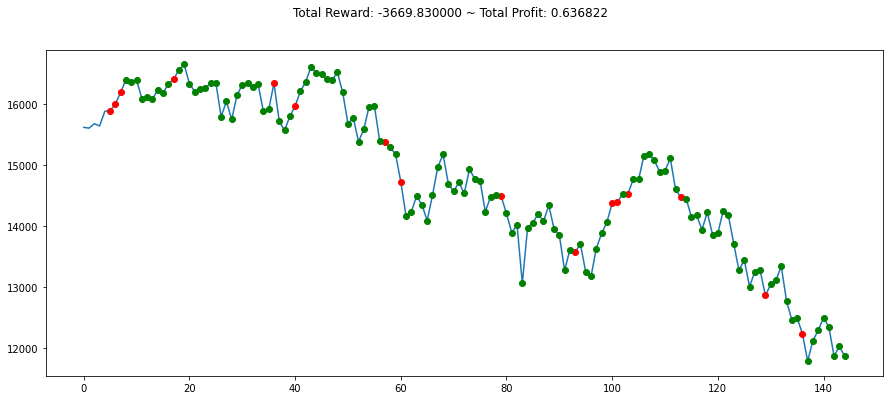

In [35]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
!tensorboard --logdir ./a2c_cartpole_tensorboard/